Student performance indicator

Lifecycle of ML project
1. Understanding problem statement
2. Data collection
3. Data checks to perform
4. EDA
5. Data preprocessing
6. Model training
7. Choose best model

1. Problem statement<br>
This project explains how students performance is affected by various factors.

2. Data collection<br>
data consists of 8 col and 1000 rows

2.1. Import data and packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
290,male,group C,associate's degree,standard,none,76,70,68
249,male,group C,high school,standard,none,68,60,53
481,female,group D,associate's degree,free/reduced,none,52,59,56
231,male,group C,associate's degree,standard,none,46,43,42
700,female,group E,bachelor's degree,standard,completed,79,81,82


2.2 Dataset information

The dataset contains several columns, including:<br>

Gender<br>
Race/Ethnicity<br>
Parental Level of Education<br>
Lunch<br>
Test Preparation Course<br>
Math Score<br>
Reading Score<br>
Writing Score<br>

3. Data checks to perform<br>
(a). check missing values<br>
(b). check duplicates<br>
(c). check data type<br>
(d). check unique values of each coloumn<br>
(e). check statistics of data<br>
(f). check categories of data<br>

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories in gender are {}".format(df['gender'].unique()))
print("Categories in race_ethnicity are {}".format(df['race_ethnicity'].unique()))
print("Categories in parental_level_of_education are {}".format(df['parental_level_of_education'].unique()))
print("Categories in lunch  are {}".format(df['lunch'].unique()))
print("Categories in test_preparation_course  are {}".format(df['test_preparation_course'].unique()))

Categories in gender are ['female' 'male']
Categories in race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch  are ['standard' 'free/reduced']
Categories in test_preparation_course  are ['none' 'completed']


In [11]:
num=[feature for feature in df.columns if df[feature].dtype!='object']
cat=[feature for feature in df.columns if df[feature].dtype=='object']
print("we have {} numerical features,these are {}".format(len(num),num))
print("we have {} categorical features,these are {}".format(len(cat),cat))

we have 3 numerical features,these are ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features,these are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=round(df['Total_score']/3,2)
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67


4. Visualizations<br>
a. Histogram<br>
b. Kernel distribution function

<Axes: xlabel='Average', ylabel='Count'>

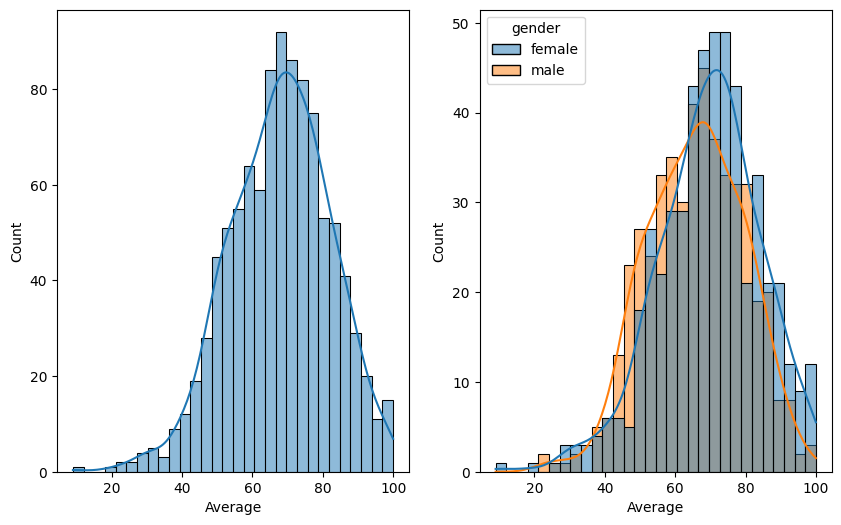

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['Average'],bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['Average'],bins=30,hue=df['gender'],kde=True)

<Axes: xlabel='Total_score', ylabel='Count'>

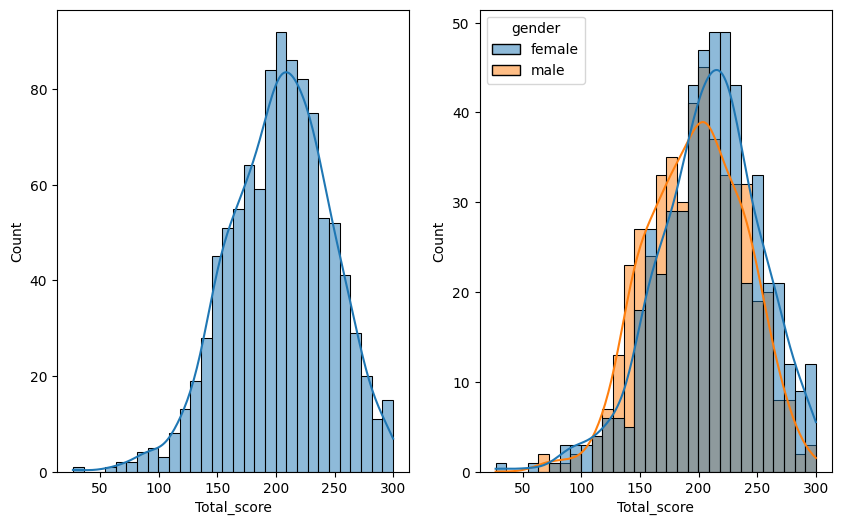

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['Total_score'],bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['Total_score'],bins=30,hue=df['gender'],kde=True)

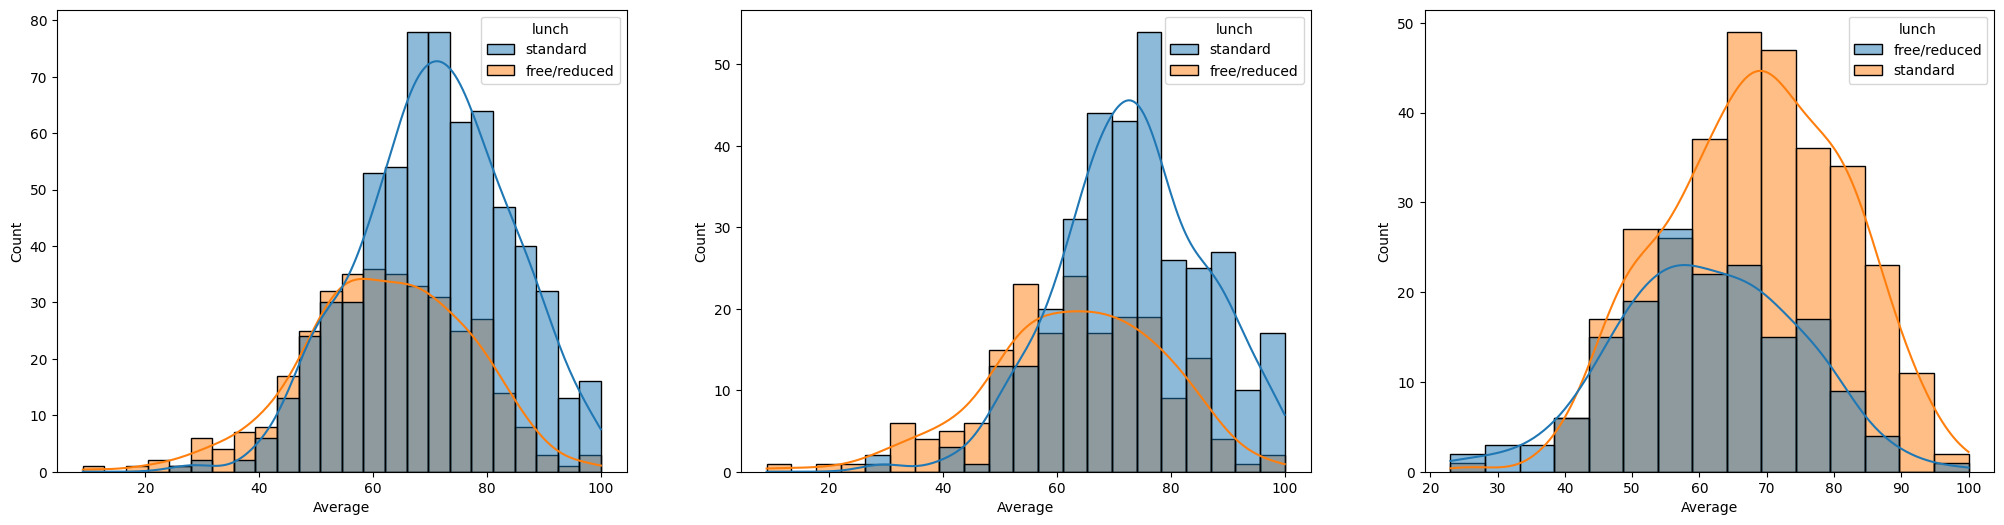

In [42]:
data1=df[df['gender']=='female']
data2=df[df['gender']=='male']
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x=df['Average'],kde=True,hue=df['lunch'])
plt.subplot(132)
sns.histplot(data=data1,x=data1['Average'],kde=True,hue=data1['lunch'])
plt.subplot(133)
sns.histplot(data=data2,x=data2['Average'],kde=True,hue=data2['lunch'])
plt.show()

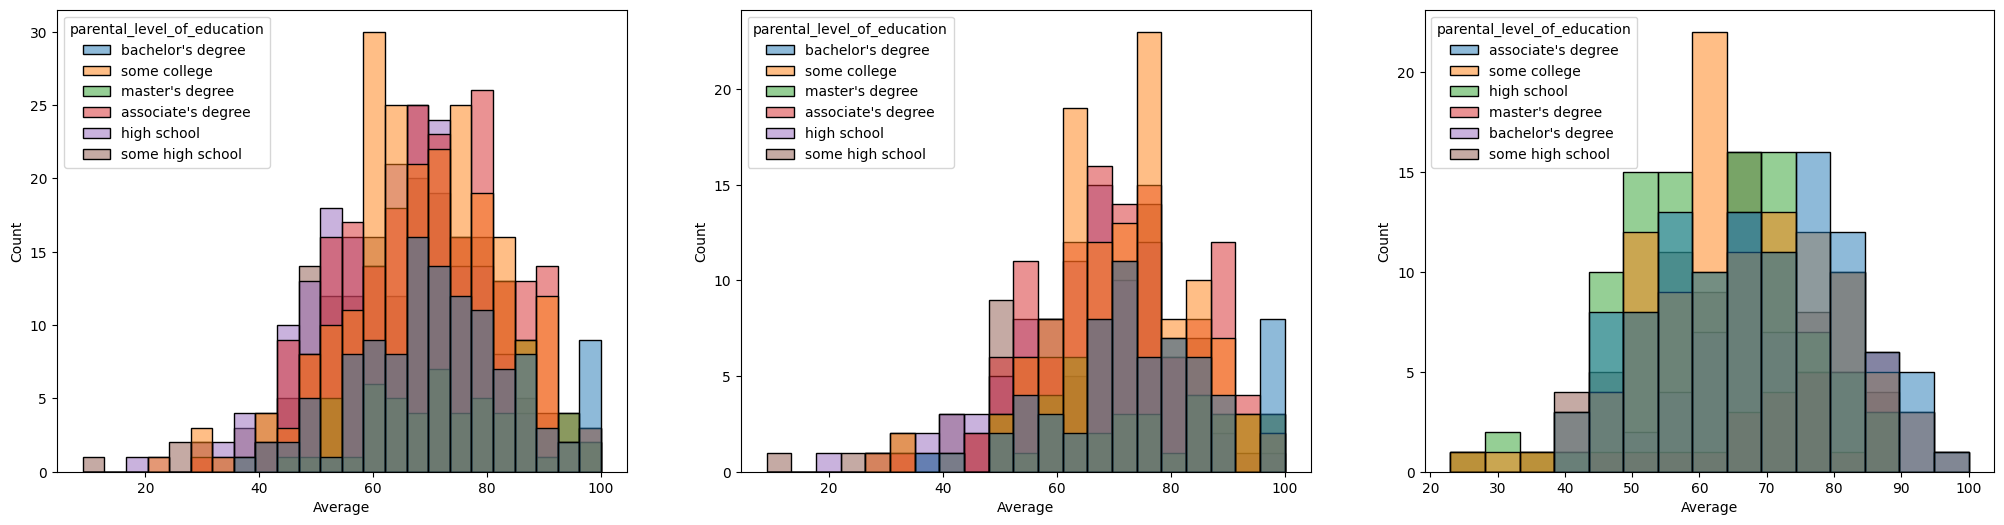

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x=df['Average'],hue=df['parental_level_of_education'])
plt.subplot(132)
sns.histplot(data=data1,x=data1['Average'],hue=data1['parental_level_of_education'])
plt.subplot(133)
sns.histplot(data=data2,x=data2['Average'],hue=data2['parental_level_of_education'])
plt.show()

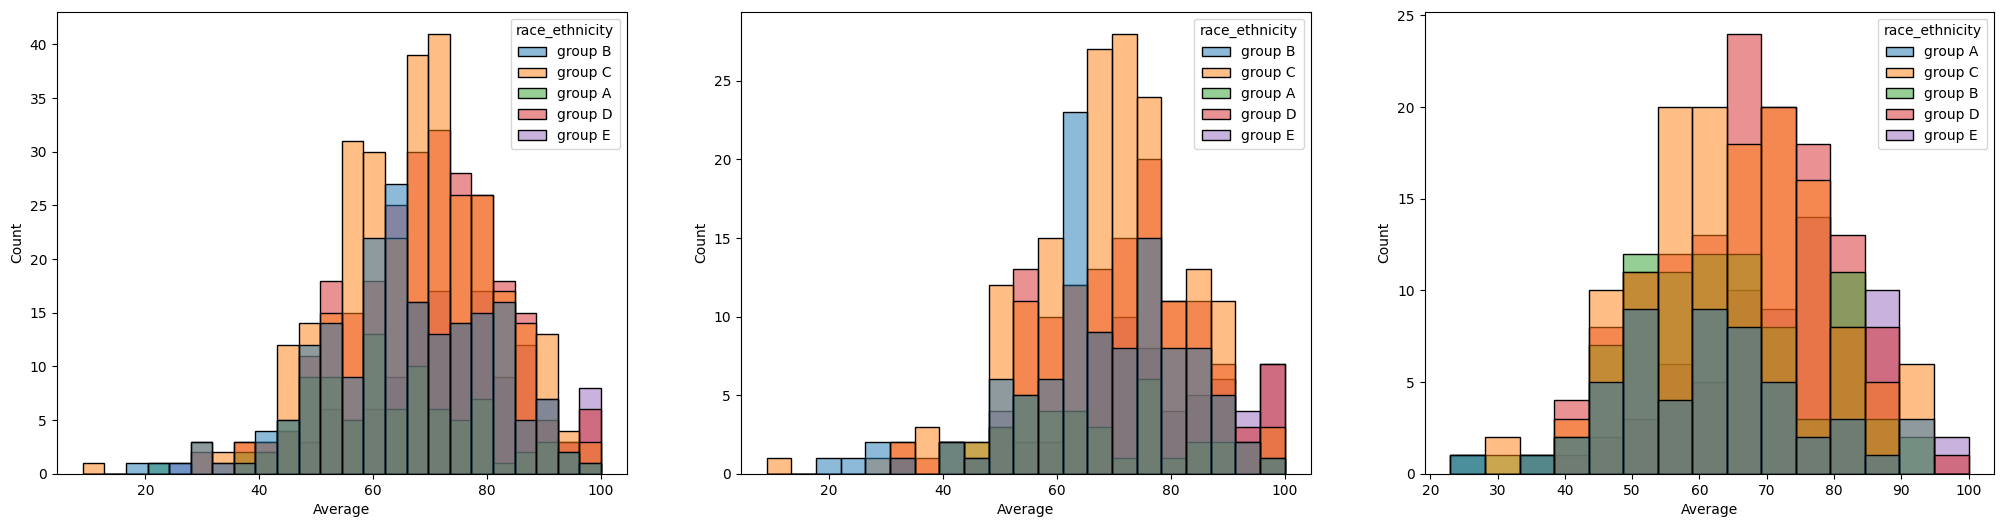

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x=df['Average'],hue=df['race_ethnicity'])
plt.subplot(132)
sns.histplot(data=data1,x=data1['Average'],hue=data1['race_ethnicity'])
plt.subplot(133)
sns.histplot(data=data2,x=data2['Average'],hue=data2['race_ethnicity'])
plt.show()

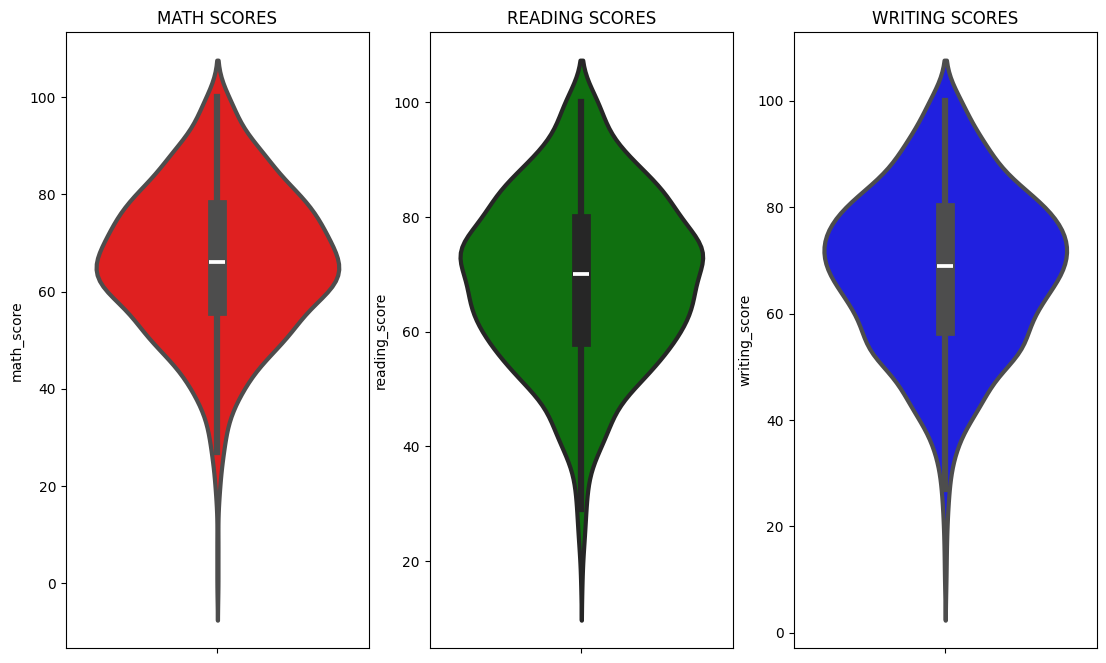

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

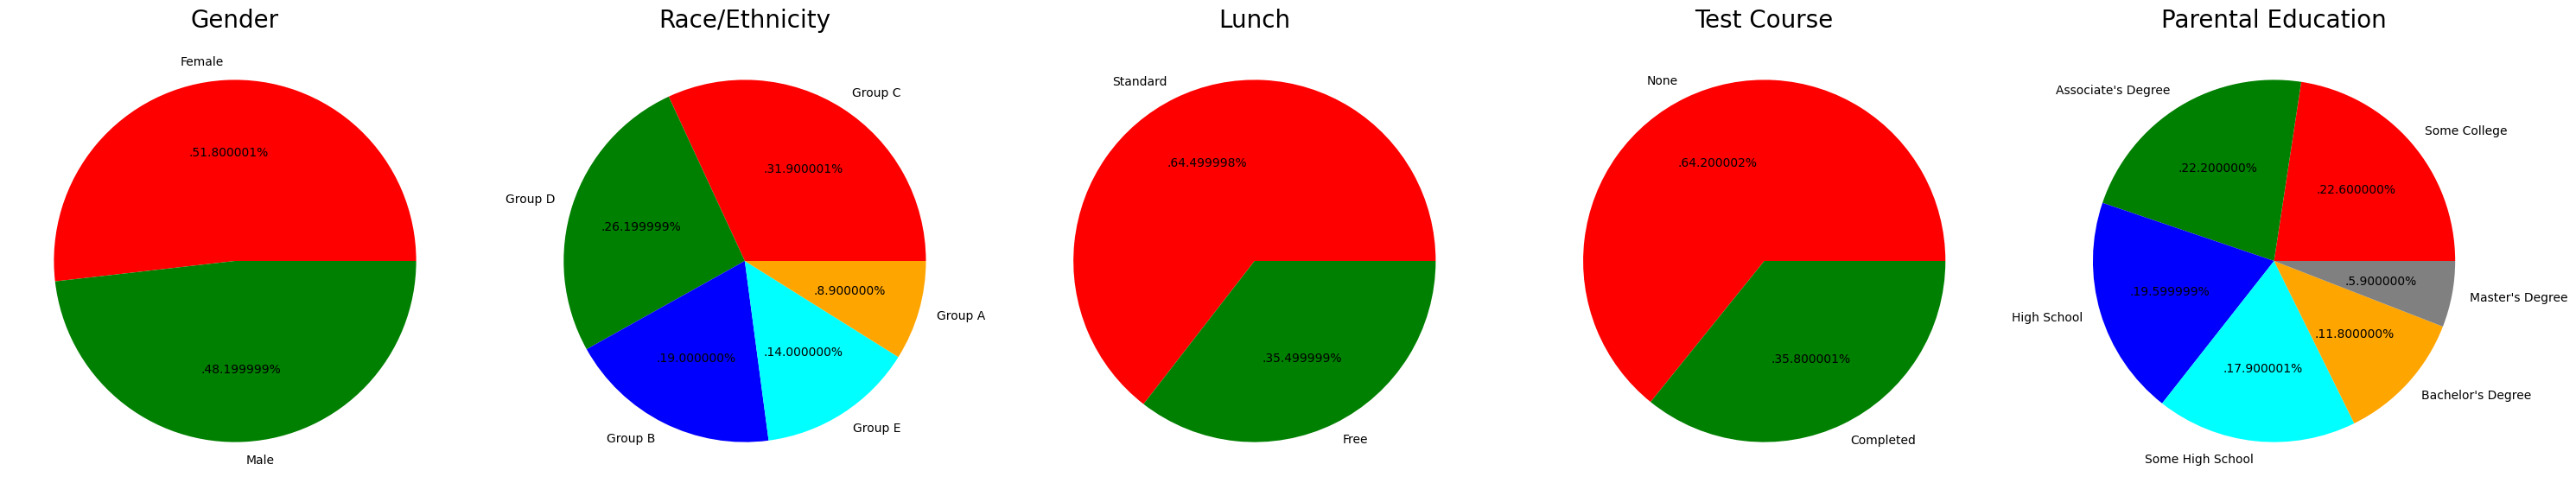

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

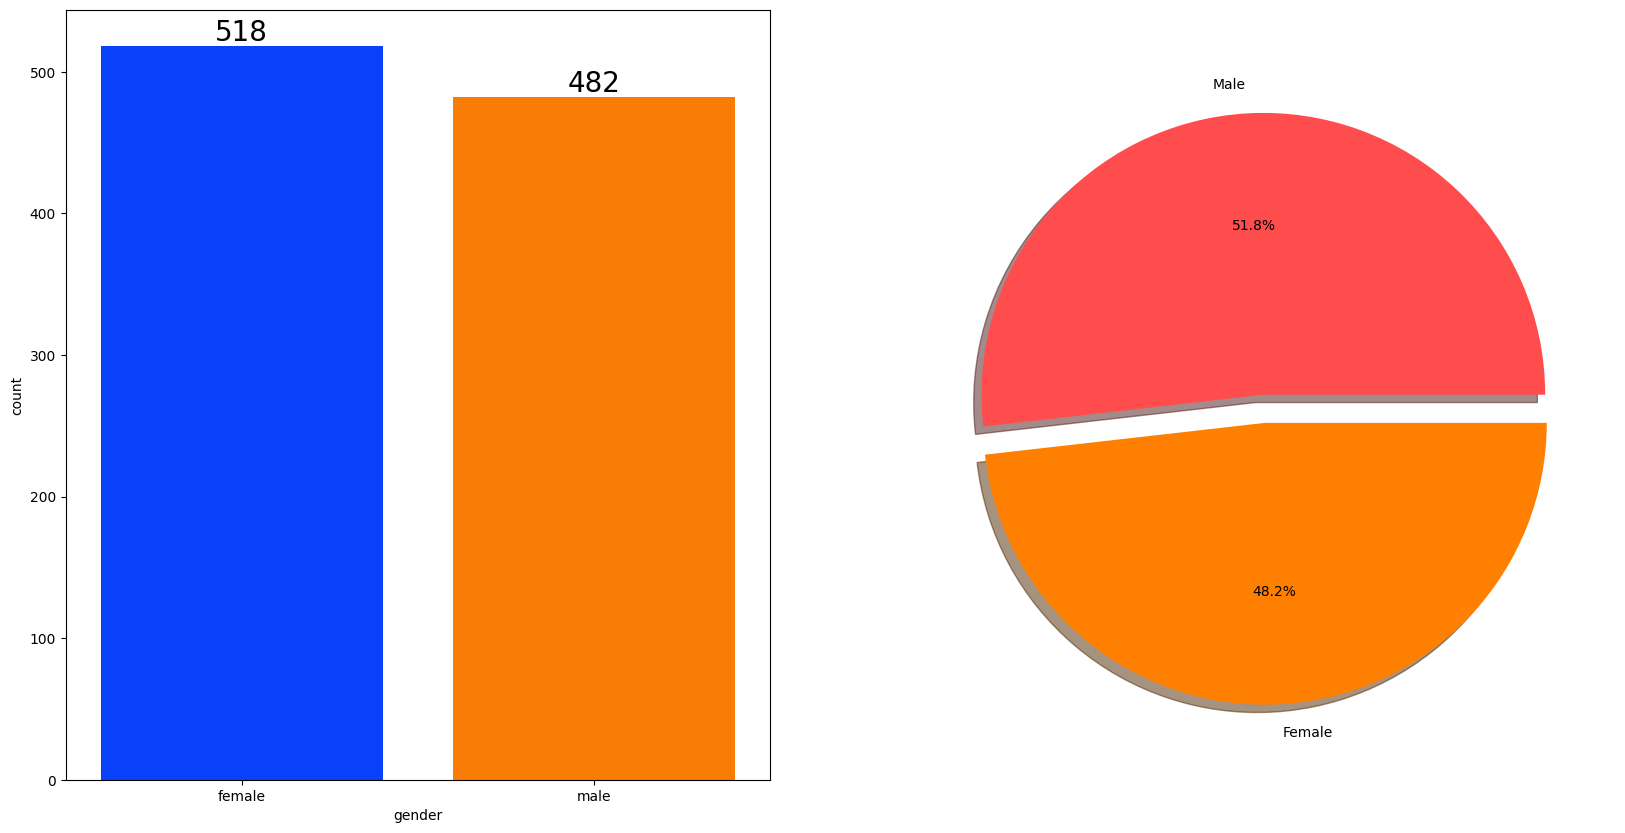

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()